In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
from data_helpers import *
from implementations import *

In [3]:
#lOAD TRAIN DATA
DATA_TRAIN_PATH = 'data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [4]:
#CLEAN TRAIN DATA: delete columns with numerous undefined values
bounds = [0.0, 0.5]
tX_clean, ind_remov = treat_undefined_values(bounds, tX)
ind_remov

[4, 5, 6, 12, 26, 27, 28]

In [5]:
#MODEL BUILDING
tx, mean, std = standardize(tX_clean,0)
y, tx = build_model_data(tx,y)

In [6]:
num_samples = len(y)
num_features = tx.shape[1]

num_samples, num_features

(250000, 24)

## Ridge regression using normal equations:

### Linear regression

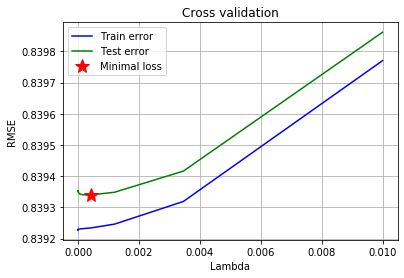

 Best value of lambda = 0.0004124626382901365 
 Loss = 0.8393400807674494 
 Weights = [-0.31440256  0.0309335  -0.25833265 -0.27093214 -0.02281768  0.27124568
 -0.03555087  0.02314085 -0.18873896  0.12465084  0.19043216 -0.00080423
 -0.00089797  0.28596836 -0.0009073   0.00228802  0.11737855  0.00081974
 -0.07359579  0.06264649  0.06562791 -0.01422376 -0.01348664 -0.08059052]


In [27]:
from cross_validation import cross_validation
from cost import compute_loss_rmse
from plots import *

lambdas = np.logspace(-20, -2, 40)
k_fold = 4
seed = 6

# prepare storage of the mean of the weights and rmse for train and test data
ws = np.zeros((num_features, len(lambdas)))
rmse_train = []
rmse_test = []

for ind, lambda_ in enumerate(lambdas):
    # prepare storage of weights and rmse for train and test data for each fold
    ws_tmp = np.zeros((num_features, k_fold))
    rmse_tr = []
    rmse_te = []
    # cross-validation
    for i,k in enumerate(range(k_fold)):
        tx_train, y_train, tx_test, y_test = cross_validation(y, tx, k, k_fold, seed)
        w,_ = ridge_regression(y_train, tx_train, lambda_)
        # store weights and rmse for train and test data for each fold
        ws_tmp[:, i] = w
        rmse_tr.append(compute_loss_rmse(y_train, tx_train, w))
        rmse_te.append(compute_loss_rmse(y_test, tx_test, w))
    # store the mean of the weights and rmse for train and test data
    ws[:, ind] = np.mean(ws_tmp, 1)
    rmse_train.append(np.mean(rmse_tr))
    rmse_test.append(np.mean(rmse_te))
    
loss = np.amin(rmse_test)
weights = ws[:, np.argmin(rmse_test)]
lambda_star = lambdas[np.argmin(rmse_test)]


plot_cross_validation(lambdas, "Lambda", lambda_star, rmse_train, rmse_test, loss)
print(" Best value of lambda = {g} \n Loss = {l} \n Weights = {we}".format(
    g=lambda_star, l=loss, we = weights))

### Polynomial regression

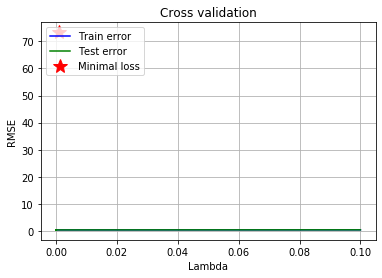

Degree=1 Best value of lambda = 0.001 
 Train loss = 41 Test loss = 73.39240000000001 Train accuracy = 73.38577142857143 Test accuracy = 73.39240000000001 
 Weights = [-0.31403524  0.03111956 -0.25758015 -0.26831534 -0.02041145  0.269048
 -0.03601701  0.02513023 -0.18679015  0.12448144  0.18957685 -0.00080876
 -0.00090839  0.28212453 -0.00092225  0.00230494  0.11607932  0.00084358
 -0.07314402  0.05955303  0.04832302 -0.00639591 -0.00603898 -0.07718828]


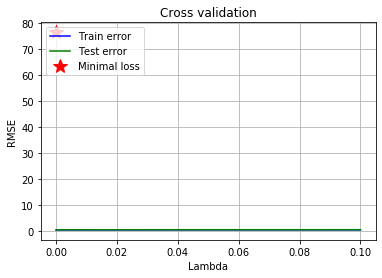

Degree=2 Best value of lambda = 7.196856730011528e-13 
 Train loss = 3 Test loss = 76.3232 Train accuracy = 76.32794285714286 Test accuracy = 76.3232 
 Weights = [-1.56336190e-01  4.09787974e-02 -2.48573831e-01 -2.11458389e-01
  9.25175603e-02  2.39361796e-01 -2.35759407e-02 -2.75094337e+02
 -1.76678500e-01  5.79499812e-02  5.35040835e+01 -6.72904853e-04
  4.97549032e-04  5.26877873e+01  1.08649071e-03 -3.56359661e-04
  8.45578896e-02  1.29509398e-03 -6.04540062e-02  3.59132134e-01
  4.44012287e-01 -1.85216097e+03  1.85162291e+03  2.33056290e+02
 -1.64781657e-01 -2.07725016e-02  3.28874623e-02  1.01115816e-02
 -2.48391449e-03 -5.88105522e-02  3.24505161e-03  9.51913487e-03
  1.78250730e-02  7.11125339e-02 -1.60581892e-02 -3.50752391e-02
 -2.90817109e-02 -1.96492037e-02 -6.61481570e-02 -3.76648960e-02
 -5.15135548e-03 -2.86869590e-02 -2.04193663e-02 -2.04624687e-01
 -1.81390946e-01  1.13511485e+03 -1.13452761e+03  6.01856313e-04]


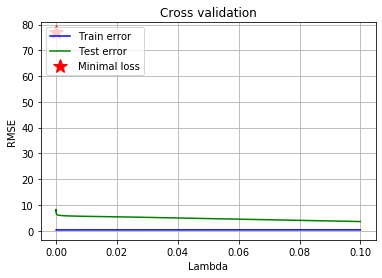

Degree=3 Best value of lambda = 1e-15 
 Train loss = 20 Test loss = 77.0008 Train accuracy = 77.01102857142857 Test accuracy = 77.0008 
 Weights = [-1.33857950e+03  7.12422581e-03 -2.40761777e-01 -2.09936480e-01
  4.83889626e-02  1.82802497e-01 -4.33083285e-02 -3.14967745e+02
 -1.80176149e-01 -6.83788112e-02  6.12820366e+01 -2.55619641e-03
  2.19172385e-03  6.02997665e+01  3.17917713e-03  7.48891131e-03
  8.61870544e-02  2.67967922e-03 -4.65381434e-02 -9.79142004e+03
  1.96863220e+00  3.25718257e+03  2.29618706e+03  2.66900488e+02
  1.98392569e+02 -5.06128605e-02  5.99045343e-02  3.80034712e-03
  1.82639955e-02 -5.36100170e-02  8.97119984e-03  3.28568395e-02
  3.94384926e-02  3.38154816e-02 -4.12674197e-02 -3.58051681e-02
 -2.01894204e-04 -3.79173078e-02 -6.61292156e-02  9.78489794e-04
  8.92443229e-04 -3.74449524e-04 -3.77404214e-02  1.37846000e+04
 -1.42350309e+00 -5.60829307e+03 -2.85143261e+03 -3.10659652e-02
  1.98115976e+02  5.02476714e-03 -3.00857319e-03  6.47735442e-05
 -1.3121

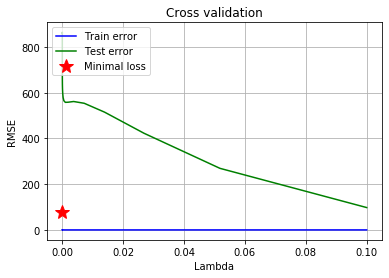

Degree=4 Best value of lambda = 1.9306977288832458e-09 
 Train loss = 21 Test loss = 77.6044 Train accuracy = 77.6192 Test accuracy = 77.6044 
 Weights = [ 7.45602814e+01  6.35031422e-02 -2.47986220e-01 -1.70083748e-01
  1.99794578e-02  1.67534845e-01 -4.33359671e-02 -8.50359078e-01
 -1.34911961e-01 -5.92170598e-02  4.78536877e-01 -3.13525042e-03
  3.17938438e-03  3.50835433e-01  4.03878803e-03  7.86082557e-03
  8.58664980e-02  3.33547448e-03 -5.15615550e-02  2.96366294e+01
  4.83285888e+00 -3.26584697e+02  7.08092083e+01  8.96479374e-01
  7.45602709e+01 -2.26007709e-02  4.97903462e-02 -3.79171497e-02
  5.26060746e-02 -6.96426974e-02  1.40838016e-02  9.13189847e-02
  6.18955410e-02  9.69242154e-04 -8.42181516e-02 -3.12282214e-02
 -8.63103706e-03 -5.47471559e-02 -8.40912451e-02 -5.91127339e-03
  1.76562509e-02  2.87597494e-03 -5.73504453e-02 -6.87025601e+01
 -4.99453092e+00 -4.20565073e+02 -9.54325184e+01 -1.10972771e-01
  7.45602724e+01 -3.87297060e-03 -4.18039005e-04  5.66473818e-03
 

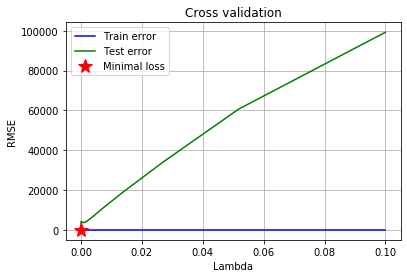

Degree=5 Best value of lambda = 2.6826957952797164e-10 
 Train loss = 0 Test loss = 78.418 Train accuracy = 78.428 Test accuracy = 78.418 
 Weights = [ 5.77496597e+01  2.81752980e-01 -2.78481313e-01 -2.07743638e-01
  2.19255795e-02  1.28791675e-01 -3.64823920e-02 -7.47393697e+00
 -9.42859163e-02 -1.72522211e-01  1.76857642e+00 -3.09768034e-03
 -1.33676297e-03  1.58044144e+00  2.44896097e-03  8.05376257e-03
  7.73974904e-02  4.20835334e-04 -5.31770617e-02 -8.06181861e+00
  8.99382970e+00 -2.54945448e+02 -6.91352781e+00  6.54240414e+00
  5.77491644e+01 -1.26692018e-02  2.07065089e-02 -6.95442758e-02
  8.07971863e-02 -7.05682929e-02  1.27228790e-02  1.24158811e-01
  7.50092799e-02 -7.30333811e-02 -1.16824883e-01 -2.84316314e-02
 -5.28439890e-03 -6.73443145e-02 -7.90748694e-02  1.36551021e-03
  4.53318809e-02  8.83947708e-03 -6.85755562e-02  8.75943557e+00
 -1.19001869e+01 -2.46774110e+02  1.64187055e+00 -1.57286431e-01
  5.77497712e+01 -5.76100684e-02  2.00715726e-02  1.83808670e-02
 -3.8

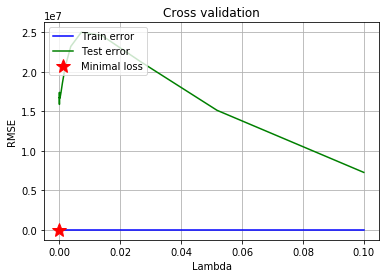

Degree=6 Best value of lambda = 1.9306977288832458e-09 
 Train loss = 8 Test loss = 79.238 Train accuracy = 79.26034285714286 Test accuracy = 79.238 
 Weights = [ 3.20564957e+01  6.30354150e-01 -3.37343009e-01 -2.51209759e-01
 -7.67258423e-03  8.29806911e-02 -3.41363067e-02 -8.70215510e-01
 -5.91473626e-02 -1.74052304e-01  4.78526002e-01 -1.85733582e-03
 -1.53449646e-03  2.85471972e-01  2.79920450e-03  7.53124047e-03
  9.18958460e-02 -7.16974655e-04 -5.29181665e-02  7.87519184e+00
  1.81848636e+01 -1.35620236e+02  1.84416799e+01  9.39563378e-01
  3.20474448e+01 -1.62869018e-01  4.97342051e-03 -6.62935906e-02
  6.82671767e-02 -5.83235253e-02  4.61598286e-03  1.35891651e-01
  7.29763401e-02 -8.30240535e-02 -1.28916994e-01  3.38827735e-03
 -1.80206031e-03 -7.46914775e-02 -6.40277469e-02  5.64423211e-03
  6.14843108e-02 -5.74129541e-03 -7.22951579e-02 -1.24118124e+01
 -2.96885696e+01 -1.92006137e+02 -2.19148681e+01 -1.45148183e-01
  3.20439288e+01 -1.50973578e-01  5.90552931e-02  3.1739305

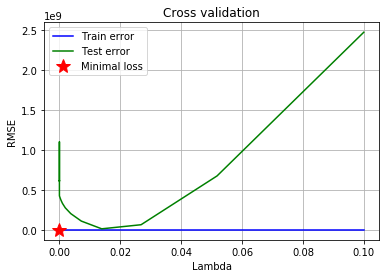

Degree=7 Best value of lambda = 3.727593720314938e-13 
 Train loss = 8 Test loss = 79.83279999999999 Train accuracy = 79.86497142857144 Test accuracy = 79.83279999999999 
 Weights = [ 2.74123705e+03  8.83559912e-01 -3.67284437e-01 -2.42741014e-01
 -1.65213253e-02  6.26647238e-02 -3.44993095e-02 -2.72706302e+02
 -5.27738515e-02 -1.41619306e-01  5.31175176e+01  8.34264912e-03
  3.87959590e-04  5.21037051e+01  2.77103605e-03  6.72774273e-03
  1.07909759e-01  9.29079702e-03 -4.88972290e-02  2.56857738e+03
  3.23019700e+01 -1.65741110e+03 -1.04047471e+03  2.31199467e+02
  2.02115792e+02 -5.05716960e-01  1.80632942e-02 -1.32341204e-02
  4.07210721e-02  1.12719353e-02 -2.90120506e-03  1.32841774e-01
  7.23328506e-02 -3.34235399e-02 -1.20473996e-01  7.05159812e-03
  1.38399631e-03 -8.23558556e-02 -6.03947652e-02  5.93577742e-03
  6.02097583e-02 -6.10951206e-03 -8.08438793e-02  1.30446624e+03
 -6.25749311e+01  8.08843679e+02  1.26276850e+03 -1.14518098e-01
 -3.89380084e+02 -1.80360126e-01  8.34

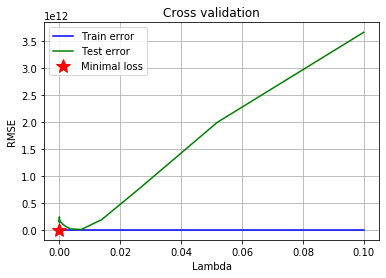

Degree=8 Best value of lambda = 1.9306977288832458e-09 
 Train loss = 23 Test loss = 79.7572 Train accuracy = 79.76434285714285 Test accuracy = 79.7572 
 Weights = [ 5.91876196e+00  9.06058915e-01 -3.57479818e-01 -1.98821261e-01
  1.22035381e-01  8.27226888e-02 -4.24856226e-02  1.65530056e+00
  3.94176746e-02 -5.67674442e-02  9.38893056e-02  7.34414868e-03
 -2.10014994e-03 -3.02826607e-01  1.61376111e-03  6.23603874e-03
  1.30097559e-01  9.61904180e-03 -6.41387205e-02  5.98267978e+01
  1.22682644e+01 -5.88573938e+01  1.50180488e+01 -1.16406616e+00
  2.61018309e+01 -7.36331675e-01  1.56484652e-02  2.07008628e-02
 -1.95329711e-01  2.64423626e-02 -5.57262766e-02  1.15727986e-01
  4.24213012e-02 -3.12776551e-01 -1.47334260e-01  5.41424854e-02
  4.25783017e-04 -7.06399712e-02 -5.46360790e-02  9.90411943e-03
  6.53588598e-02 -7.02266182e-03 -9.77161907e-02  3.93005392e+01
 -3.62010119e+01 -8.44794699e+01  2.98677186e+01 -8.21808745e-02
  1.23853610e+01 -1.06128480e-01  8.09926848e-02 -2.6669

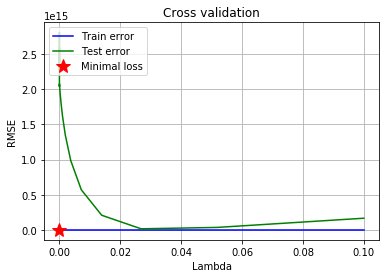

Degree=9 Best value of lambda = 1.9306977288832458e-09 
 Train loss = 25 Test loss = 80.286 Train accuracy = 80.29257142857142 Test accuracy = 80.286 
 Weights = [ 9.13764090e+00  8.57722984e-01 -3.57883631e-01 -1.61457820e-01
  3.84969833e-02  7.96482269e-02 -3.33488080e-02 -1.53621002e+00
  1.66940876e-02 -1.21801015e-01  7.03276868e-01  1.23375778e-02
  1.17497072e-02  3.11267372e-01 -2.39206155e-03 -5.52996867e-03
  1.16116525e-01  6.23368651e-03 -6.07061516e-02  1.49727518e+00
  1.88816468e+01 -6.26568814e+01 -5.58504795e+00  1.50142112e+00
  1.10605801e+01 -5.31110627e-01 -2.10442664e-02 -1.32518374e-02
 -8.74563486e-03  7.71989225e-02 -1.11215083e-02  8.40619751e-02
  5.24989164e-02 -4.75241337e-01 -1.42767204e-01  5.71851241e-02
  2.20690306e-03 -7.14096028e-02 -5.05326506e-02  1.43705992e-02
  5.15500892e-02 -8.13767416e-03 -1.03225701e-01  1.06759914e+00
 -2.98174866e+01 -7.91948499e+01  2.80721623e-02 -1.41732827e-02
  1.39184951e+01 -2.15647922e-01  9.19646478e-02 -7.448445

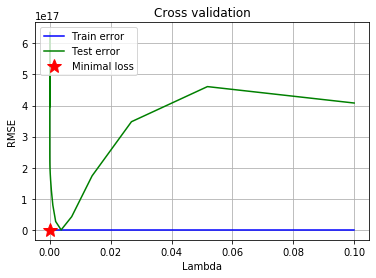

Degree=10 Best value of lambda = 1e-09 
 Train loss = 19 Test loss = 80.838 Train accuracy = 80.87222857142856 Test accuracy = 80.838 
 Weights = [ 4.18448044e+01  9.79396010e-01 -3.76975789e-01 -1.73901717e-01
  3.47783005e-02  8.22709893e-02 -3.26587785e-02  3.00248062e+00
  2.10172985e-02 -1.35888202e-01 -1.48948048e-01  1.21684200e-02
  1.04449381e-02 -5.75441611e-01 -3.52906197e-03 -3.31899652e-03
  1.09750902e-01  6.93636282e-03 -5.94807825e-02  1.92840534e+02
  1.32667153e+01 -9.57890231e+00  2.08195492e+01 -2.37314855e+00
 -2.41002096e+01 -1.67004846e-01 -5.60445840e-02 -1.01786094e-01
  3.48176390e-02  5.22798049e-02 -6.22535596e-03  1.90567715e-02
  5.03454101e-02 -2.77801801e-01 -1.38825001e-01  3.58070172e-02
  9.39631595e-03 -4.41342321e-02 -3.92542011e-02  4.22284404e-02
  5.01666614e-02  2.08179799e-02 -1.00394883e-01  1.56133621e+02
 -5.15356565e+00 -6.82780185e+01  8.09707678e+00  2.36621935e-02
  4.35637661e+00 -7.91929761e-01  1.29972416e-01 -7.71923542e-02
 -5.90919

In [14]:
from cross_validation import cross_validation
from cost import ridge_loss
from plots import plot_cross_validation

degrees = 10
lambdas = np.logspace(-15, -1, 50)
k_fold = 8
seed = 6

Lambdas_star = []
Accuracy = []

for indices, degree in enumerate(range(1, degrees+1)):
    tx_augmented = build_poly_all_features(tx, degree)
                                                      
    # prepare storage of the mean of the weights and rmse for train and test data
    ws = np.zeros((tx_augmented.shape[1], len(lambdas)))
    rmse_train = []
    rmse_test = []
    accuracy_train = []
    accuracy_test = []
    
    for ind, lambda_ in enumerate(lambdas):
        # prepare storage of weights and rmse for train and test data for each fold
        ws_tmp = np.zeros((tx_augmented.shape[1], k_fold))
        rmse_tr = []
        rmse_te = []
        accuracy_tr = []
        accuracy_te = []
        # cross-validation
        for i,k in enumerate(range(k_fold)):
            tx_train, y_train, tx_test, y_test = cross_validation(y, tx_augmented, k, k_fold, seed)
            #ridge regression
            w,_ = ridge_regression(y_train, tx_train, lambda_)
            # store weights and rmse for train and test data for each fold
            ws_tmp[:, i] = w
            rmse_tr.append(ridge_loss(y_train, tx_train, w, lambda_))
            rmse_te.append(ridge_loss(y_test, tx_test, w, lambda_))
            accuracy_tr.append(predict_accuracy(y_train,tx_train,w))
            accuracy_te.append(predict_accuracy(y_test,tx_test,w)) 
        # store the mean of the weights and rmse for train and test data
        ws[:, ind] = np.mean(ws_tmp, 1)
        rmse_train.append(np.mean(rmse_tr))
        rmse_test.append(np.mean(rmse_te))
        accuracy_train.append(np.mean(accuracy_tr))
        accuracy_test.append(np.mean(accuracy_te))
            
    loss_train = np.argmax(accuracy_train)    
    loss_test = np.amax(accuracy_test)
    training_accuracy = np.amax(accuracy_train)
    test_accuracy = np.amax(accuracy_test)
    weights = ws[:, np.argmax(accuracy_test)]
    lambda_star = lambdas[np.argmax(accuracy_test)]

    plot_cross_validation(lambdas, "Lambda", lambda_star, rmse_train, rmse_test, loss_test)
    print("Degree={d} Best value of lambda = {g} \n Train loss = {l_tr} Test loss = {l_te} Train accuracy = {tr_ac} Test accuracy = {te_ac} \n Weights = {we}".format(
        d=degree, g=lambda_star, l_tr=loss_train, l_te=loss_test, tr_ac=training_accuracy, te_ac=test_accuracy, we = weights))
    
    Lambdas_star.append(lambda_star)
    Accuracy.append(test_accuracy)
    

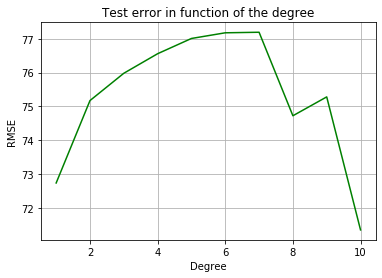

Best degree=7 Best value of lambda = 0.1 
 Accuracy = 77.1924 
 Weights = [-0.26222     0.04724003 -0.1944542  -0.0998902   0.03863293  0.11824985
 -0.03836593  0.0199158  -0.0923543   0.10819097  0.12993547 -0.00103606
 -0.00195132  0.08294884 -0.0009064   0.00227964  0.03518709  0.00155022
 -0.02938913  0.00695866  0.00700053  0.00887501  0.0088971  -0.02487357]


In [12]:
plt.plot(range(1, degrees+1), Accuracy, color='g')
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("Test error in function of the degree")
plt.grid(True)
plt.show()

degree_star =  np.argmax(Accuracy) + 1
Accuracy_star = np.amax(Accuracy)
Lambda_star = Lambdas_star[np.argmax(Accuracy)]

TX_train = build_poly_all_features(tx, degree_star)
Weights_star,_ = ridge_regression(y, tx, Lambda_star)
print("Best degree={d} Best value of lambda = {g} \n Accuracy = {ac} \n Weights = {we}".format(
        d=degree_star, g=Lambda_star, ac=Accuracy_star, we = Weights_star))

In [29]:
#PREDICT TRAINING ACCURACY
training_accuracy = predict_accuracy(y,tx,Weights_star)
training_accuracy

66.2124

## Generate predictions and save ouput in csv format for submission:

In [27]:
DATA_TEST_PATH = 'data/test.csv'
ytest, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
tX_test_clean = np.delete(tX_test, ind_remove, axis=1)
_, tx_test = build_model_data(tX_test_clean,ytest)

In [28]:
OUTPUT_PATH = 'data/submission_ridge.csv'
y_pred = predict_labels(Weights_star, tx_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)